In [2]:
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
# import cv2
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report





In [3]:
directory = 'data/archive'

In [4]:
# !mkdir -p saved_models

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=78,
  image_size=(50,50),
  batch_size=32)
    

Found 277524 files belonging to 2 classes.
Using 222020 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=78,
  image_size=(50, 50),
  batch_size=32)

Found 277524 files belonging to 2 classes.
Using 55504 files for validation.


In [7]:
train_class_names = train_ds.class_names
print(train_class_names)

['idc', 'non_idc']


In [8]:
for images, labels in train_ds:
    print(len(labels),labels)

32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 

32 tf.Tensor([1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 

32 tf.Tensor([0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 

32 tf.Tensor([1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 

32 tf.Tensor([1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 

32 tf.Tensor([0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 

32 tf.Tensor([0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 

32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 

32 tf.Tensor([0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 

32 tf.Tensor([1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 

32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 

32 tf.Tensor([1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 

32 tf.Tensor([1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 

32 tf.Tensor([1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 

32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 

32 tf.Tensor([1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 

32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 

32 tf.Tensor([1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 

32 tf.Tensor([1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 

32 tf.Tensor([1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 

32 tf.Tensor([0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 

32 tf.Tensor([1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 

32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 

32 tf.Tensor([1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 

32 tf.Tensor([1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 

32 tf.Tensor([1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 

32 tf.Tensor([1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 

32 tf.Tensor([0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 

32 tf.Tensor([1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 

32 tf.Tensor([1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 

32 tf.Tensor([0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 

32 tf.Tensor([1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 

32 tf.Tensor([1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 

32 tf.Tensor([0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 

32 tf.Tensor([1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 

32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 

32 tf.Tensor([0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 

32 tf.Tensor([0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 

32 tf.Tensor([0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 

32 tf.Tensor([1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 

32 tf.Tensor([1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 

32 tf.Tensor([1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 

32 tf.Tensor([1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 

32 tf.Tensor([1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 

32 tf.Tensor([1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 

32 tf.Tensor([0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 

32 tf.Tensor([0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 

32 tf.Tensor([0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 

32 tf.Tensor([1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 

32 tf.Tensor([1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 

32 tf.Tensor([1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 

32 tf.Tensor([1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 

32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 

32 tf.Tensor([0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 

32 tf.Tensor([1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 

32 tf.Tensor([1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 

32 tf.Tensor([0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 

32 tf.Tensor([1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 

32 tf.Tensor([1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 

32 tf.Tensor([1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 

32 tf.Tensor([1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 

32 tf.Tensor([1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 

32 tf.Tensor([0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 

32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 

32 tf.Tensor([1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 

32 tf.Tensor([1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 

32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 

32 tf.Tensor([1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 

32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 

32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 

32 tf.Tensor([1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 

32 tf.Tensor([0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 

32 tf.Tensor([1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 

32 tf.Tensor([1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 

32 tf.Tensor([1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 

32 tf.Tensor([1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 

32 tf.Tensor([0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 

32 tf.Tensor([1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 

32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 

32 tf.Tensor([1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 

32 tf.Tensor([1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)
32 tf.Tensor([1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 

In [9]:
len(train_ds)

6939

In [10]:
# y_train

Pull Random Images

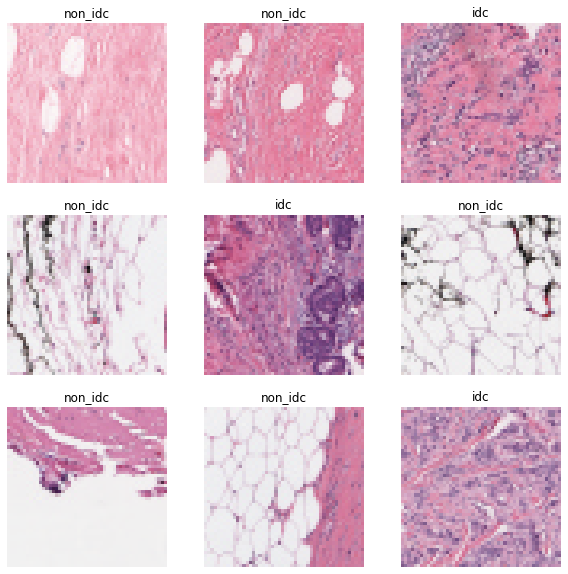

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[labels[i]])
    plt.axis("off")

In [12]:
val_class_names = val_ds.class_names
print(val_class_names)

['idc', 'non_idc']


In [13]:
y_val = []
for images, labels in val_ds:
    for i in range(len(labels)):
        y_val.append(val_class_names[labels[i]])
len(y_val)

55504

In [14]:
# y_val

In [69]:
unique, counts = np.unique(y_val, return_counts=True)
dict(zip(unique, counts))

{'idc': 15832, 'non_idc': 39672}

/home/shredder/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Distribution of Target Classes'}, ylabel='count'>

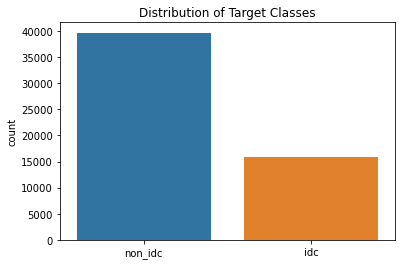

In [15]:
plt.title("Distribution of Target Classes")
sns.countplot(y_val) 

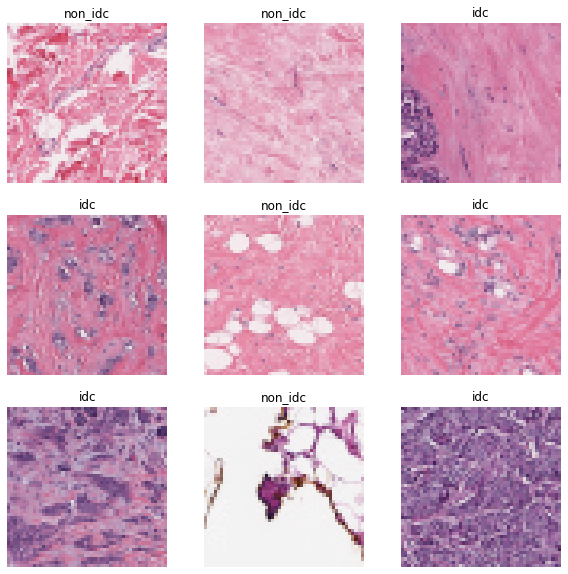

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(val_class_names[labels[i]])
    plt.axis("off")

**Models**

Main Model

In [18]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax' )
])

In [19]:
model.compile(
  optimizer='adam',
  loss='SparseCategoricalCrossentropy',
  metrics=['accuracy'])

In [20]:
main_model = model.fit(train_ds,validation_data=val_ds, epochs=12)

Epoch 1/12
6939/6939 [==============================] - 273s 39ms/step - loss: 0.3863 - accuracy: 0.8336 - val_loss: 0.3488 - val_accuracy: 0.8528
Epoch 2/12
6939/6939 [==============================] - 270s 39ms/step - loss: 0.3461 - accuracy: 0.8526 - val_loss: 0.3348 - val_accuracy: 0.8570
Epoch 3/12
6939/6939 [==============================] - 276s 40ms/step - loss: 0.3320 - accuracy: 0.8593 - val_loss: 0.3529 - val_accuracy: 0.8469
Epoch 4/12
6939/6939 [==============================] - 269s 39ms/step - loss: 0.3244 - accuracy: 0.8623 - val_loss: 0.3211 - val_accuracy: 0.8637
Epoch 5/12
6939/6939 [==============================] - 266s 38ms/step - loss: 0.3198 - accuracy: 0.8638 - val_loss: 0.3205 - val_accuracy: 0.8635
Epoch 6/12
6939/6939 [==============================] - 266s 38ms/step - loss: 0.3150 - accuracy: 0.8663 - val_loss: 0.3188 - val_accuracy: 0.8662
Epoch 7/12
6939/6939 [==============================] - 302s 43ms/step - loss: 0.3114 - accuracy: 0.8684 - val_loss: 0

In [ ]:
model.summary()

In [ ]:
plotmodelhistory(main_model) 

In [ ]:
class_preds = []
target = []
for images, labels in val_ds:
    class_preds.append(model.predict_classes(images))
    target.append(labels)

Model 1

In [10]:
num_classes = 2

model1 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model1.compile(
  optimizer='adam',
  loss='SparseCategoricalCrossentropy',
  metrics=['accuracy'])

In [12]:
model_1 = model1.fit(train_ds,validation_data=val_ds, epochs=5)

Epoch 1/5
6939/6939 [==============================] - 311s 45ms/step - loss: 0.6950 - accuracy: 0.2971 - val_loss: 0.6932 - val_accuracy: 0.2852
Epoch 2/5
6939/6939 [==============================] - 277s 40ms/step - loss: 0.6932 - accuracy: 0.2836 - val_loss: 0.6932 - val_accuracy: 0.2852
Epoch 3/5
6939/6939 [==============================] - 279s 40ms/step - loss: 0.6932 - accuracy: 0.2836 - val_loss: 0.6932 - val_accuracy: 0.2852
Epoch 4/5
6939/6939 [==============================] - 271s 39ms/step - loss: 0.6932 - accuracy: 0.2836 - val_loss: 0.6932 - val_accuracy: 0.2852
Epoch 5/5
6939/6939 [==============================] - 271s 39ms/step - loss: 0.6932 - accuracy: 0.2836 - val_loss: 0.6932 - val_accuracy: 0.2852


In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0

In [23]:
model1.save('saved_models/model_1')

INFO:tensorflow:Assets written to: saved_models/model_1/assets


In [29]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


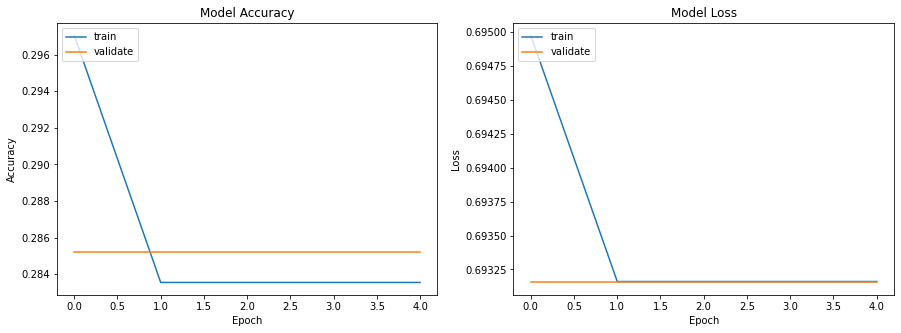

In [16]:
# list all data in history
print(model_1.history.keys())

plotmodelhistory(model_1) 

Model 2

In [17]:
num_classes = 2

model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes )
])

In [18]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [19]:
model_2 = model2.fit(train_ds,validation_data=val_ds, epochs=7)

Epoch 1/7
6939/6939 [==============================] - 293s 42ms/step - loss: 0.3909 - accuracy: 0.8308 - val_loss: 0.3649 - val_accuracy: 0.8462
Epoch 2/7
6939/6939 [==============================] - 295s 43ms/step - loss: 0.3515 - accuracy: 0.8505 - val_loss: 0.3392 - val_accuracy: 0.8582
Epoch 3/7
6939/6939 [==============================] - 271s 39ms/step - loss: 0.3358 - accuracy: 0.8570 - val_loss: 0.3306 - val_accuracy: 0.8579
Epoch 4/7
6939/6939 [==============================] - 269s 39ms/step - loss: 0.3275 - accuracy: 0.8604 - val_loss: 0.3244 - val_accuracy: 0.8630
Epoch 5/7
6939/6939 [==============================] - 269s 39ms/step - loss: 0.3217 - accuracy: 0.8633 - val_loss: 0.3375 - val_accuracy: 0.8574
Epoch 6/7
6939/6939 [==============================] - 266s 38ms/step - loss: 0.3177 - accuracy: 0.8650 - val_loss: 0.3237 - val_accuracy: 0.8634
Epoch 7/7
6939/6939 [==============================] - 281s 41ms/step - loss: 0.3139 - accuracy: 0.8666 - val_loss: 0.3218 -

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)         

In [22]:
model2.save('saved_models/model_2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_models/model_2/assets


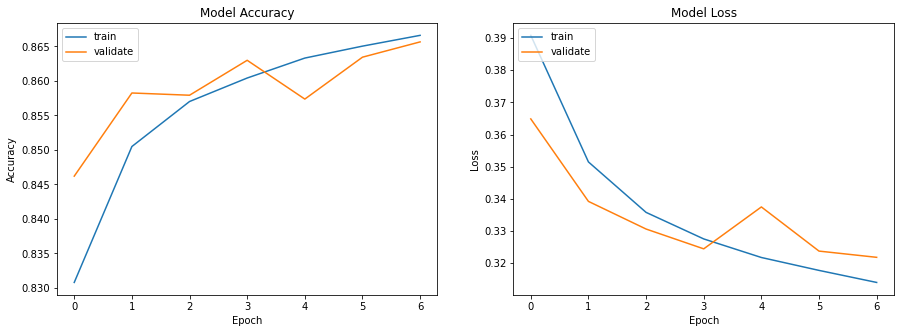

In [28]:
plotmodelhistory(model_2) 

In [25]:
y_pred = model2.predict(val_ds)

In [26]:
y_pred

array([[-0.7297468 ,  0.5765064 ],
       [-0.28170955,  0.18683293],
       [-2.0447307 ,  2.1047177 ],
       ...,
       [ 0.31091294, -0.10579589],
       [ 1.0017984 , -0.22498162],
       [-0.6151314 ,  0.48663872]], dtype=float32)

In [30]:
predictions = model2.predict(
      x=val_ds
    , batch_size=32
    , verbose=0
)  

In [31]:
counter = 0
for i in predictions:
    print(i)
    counter += 1
    if counter > 9:
        break

[ 0.9522884 -0.6970152]
[-1.808477   1.5775509]
[-0.06074657  0.8399827 ]
[ 0.6254121 -1.3971992]
[-1.860601   1.8869038]
[-1.5038717  1.7640548]
[ 1.5610225 -1.1441574]
[-0.7297468  0.5765064]
[-0.32529375  0.44454446]
[-2.6790714  2.6553633]


Should be absolute value as max?

In [32]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [35]:
len(rounded_predictions)

55504

In [39]:
rounded_predictions

array([0, 1, 1, ..., 1, 1, 1])

In [34]:
rounded_predictions.sum()

40643

In [71]:
predictions = model2.predict(val_ds)
score = tf.nn.softmax(predictions)


In [69]:
score

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.05951229, 0.94048774], dtype=float32)>

In [70]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(val_class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to non_idc with a 94.05 percent confidence.


In [51]:
for i in predictions:
    print(i)

[-9.497532   7.9424534]
[ 1.1851547  -0.66361785]
[-2.4174693  2.4668262]
[-0.55939215  0.43885815]
[-1.5273225  0.6497693]
[-1.589311   1.6733476]
[-1.5922432  1.6371441]
[ 2.4296532 -1.5715456]
[-0.9087177  1.0921942]
[ 0.69177115 -0.97759414]
[-4.3907404  2.7306683]
[ 1.7008637 -0.4142366]
[-1.6807003  1.6494875]
[-0.40686518  0.8530486 ]
[-1.4555148  1.2667707]
[-2.6557436  2.5643885]
[-2.733787  2.726833]
[-0.6857036   0.70345193]
[ 1.6417077  -0.30680186]
[ 0.981235  -1.1531861]
[ 0.56935847 -0.36407954]
[-1.849878    0.91033775]
[-0.9211961  1.1712122]
[-1.7014279   0.64435893]
[-2.1389542  2.2492607]
[-1.7325276  1.6621174]
[ 2.0497139 -1.0503088]
[-1.2880529  0.8800973]
[-2.8612084  2.434127 ]
[ 1.7693741 -0.9911757]
[-2.0196314  1.877826 ]
[-0.9277768  0.6657887]
[-1.5069598  1.5581877]
[-1.8936654  2.096545 ]
[-1.8436197  1.7555761]
[0.35899043 0.08341745]
[-1.9211286  0.8248697]
[ 1.1354153 -1.5664257]
[-1.4908335  2.2023728]
[-0.8702817  1.0333203]
[ 1.0967265 -0.4487528]


[-1.4999806  1.3345512]
[-1.2430797  1.632153 ]
[-0.60038364 -0.15357776]
[0.29529876 0.13761115]
[ 1.2365922 -0.3033655]
[-1.55676    1.4190145]
[-1.248226   1.4000367]
[-2.1420567  1.9488924]
[ 0.28512523 -0.5639286 ]
[-2.4013307  2.3571916]
[-1.5160782  1.4657778]
[-0.527827  -0.9552593]
[ 0.23117946 -0.4354316 ]
[-1.4581765  1.7728455]
[-1.1562389  1.3931917]
[ 0.06817374 -0.9298808 ]
[-0.304315   -0.50213385]
[ 1.1428946  -0.56556034]
[-3.5517159  3.4542823]
[-0.12251255 -0.07570313]
[-0.85981905  1.2223775 ]
[-0.8557714  1.0332761]
[ 1.4085602  -0.12191606]
[-3.169085   2.2289994]
[-1.8223312  1.5395845]
[-2.0435636  2.2811892]
[ 1.4954814 -1.4437475]
[-1.3859414  1.2363998]
[-2.3169022  2.383196 ]
[-1.8423547  1.9521712]
[ 0.5330179 -1.0453249]
[-2.1689196  1.8400445]
[-1.8931044  2.1800625]
[-1.3975335  1.3340176]
[-2.4403014  2.09717  ]
[-1.1879431   0.91820705]
[ 0.94877696 -0.6175654 ]
[0.25880352 0.01648392]
[-0.77949536  0.40954864]
[-1.6688141  1.5102619]
[-0.9644903  0.5

[-2.1304345  2.0037425]
[ 0.53151715 -0.23161396]
[-1.9806572  2.0260367]
[-1.8556687  1.5785453]
[-1.4549743  1.4461842]
[-3.4814405  2.5330877]
[-2.3676696  1.700125 ]
[-3.285797   3.3852623]
[-1.3495185  1.1198484]
[-1.923288   2.3839633]
[-1.994672   1.8907037]
[ 1.1152371  -0.49884912]
[-1.607837   2.1903093]
[-1.4250354  0.6709702]
[-1.4665711  1.6215839]
[-1.7372513  1.6700361]
[0.30707523 0.47277677]
[ 1.177844  -1.4019239]
[-2.9938471  2.4801707]
[ 1.7171007 -1.9886879]
[-2.177183   2.1271498]
[-2.6542678  2.625478 ]
[ 1.5350752  -0.41375092]
[ 1.8177286 -0.3109805]
[ 2.6174688 -1.2106605]
[-2.172639   2.3511682]
[-2.3038604  2.4225466]
[-3.027389   3.9395108]
[-2.1260066  1.9965417]
[ 0.07708716 -0.32237136]
[-0.31679162 -0.4504168 ]
[-0.39723665  0.04887289]
[-2.023238   2.0861557]
[ 1.5972596 -1.4878222]
[-1.5277034  1.4556048]
[-0.94620085  0.22058631]
[-2.4428039  1.3073272]
[-1.9474381  2.0814316]
[-1.3014069  1.4686694]
[-1.3683718  1.2889696]
[-1.5576829  1.6066672]
[-

[-1.8975432  1.9453887]
[ 0.13378379 -0.47054726]
[-2.7986732  2.8814995]
[ 2.471459  -1.8382055]
[ 1.5605658 -1.1875277]
[ 0.0608933  -0.14678311]
[-1.848609   1.8540145]
[0.12522443 0.19082093]
[ 0.9756332 -0.9381428]
[ 1.2947468  -0.15925467]
[ 0.91625535 -0.15988082]
[-2.11531    1.9041395]
[ 1.7043167 -1.0926629]
[-0.43296027 -0.5051437 ]
[-1.7726352  1.9252238]
[-1.0401121  1.5398456]
[ 0.85916066 -0.94938743]
[-1.0157537  0.7464161]
[ 0.2781687 -0.5907333]
[-8.661885  5.45658 ]
[-2.5146854  2.694257 ]
[-1.8229668  0.9902063]
[-2.4509985  2.3609326]
[-1.9679171  2.0379694]
[-0.46392083  0.18007508]
[ 0.5466435 -1.1322031]
[-0.7920004  1.2965373]
[-1.5844818   0.16449538]
[-1.4820586  1.1037518]
[-1.7685064  1.7303898]
[-3.3218355  2.9896586]
[-1.6647595  1.4345611]
[-1.9023982  0.7539141]
[-19.839794  12.630468]
[-1.4224201  1.369993 ]
[ 0.8796931 -0.7160353]
[-1.6036011  1.3565321]
[ 1.3500854 -1.6847184]
[-4.571795   3.9247098]
[ 1.8127334 -0.709465 ]
[-1.8573202  1.8669767]
[-

[-1.1883086  1.1906409]
[-1.4552383  1.51538  ]
[-1.17759    0.6162383]
[-3.0372186  1.6202967]
[-1.8831359  1.6715919]
[ 0.6538096 -0.5192242]
[-1.1253359  1.3358545]
[-1.1322312  1.1376716]
[ 1.2577924 -1.6938403]
[-0.4107526  -0.00650137]
[-1.8241794  1.606888 ]
[-2.0877666  2.2233293]
[-1.1535537  1.2580042]
[-1.1631311  0.9354767]
[-1.8649452  1.7423275]
[-2.4312935  2.1585243]
[-1.8307412  1.504515 ]
[ 0.67674303 -0.24207515]
[-1.1859041  0.3301181]
[0.7003274  0.86590797]
[ 0.7660786  -0.64416414]
[ 0.5239731 -0.4876534]
[ 1.3422898 -1.1645367]
[-1.4209598  1.3503503]
[ 1.8021805  -0.76319283]
[0.11815374 0.5291086 ]
[-4.043903   2.4704099]
[ 1.5790931 -1.5805571]
[-1.6154603  1.5372766]
[-2.730626  2.325564]
[-1.9341288  1.9617993]
[-3.4079556  3.32505  ]
[-0.82059014  0.55484   ]
[-3.1652403  2.7024171]
[-2.6965816  2.5228217]
[-1.7350234  1.1969931]
[-33.439857  19.43663 ]
[ 1.6172624  -0.59719235]
[ 1.417801  -1.4120213]
[ 0.5463895 -1.2910085]
[-2.8914933  2.3967526]
[-1.21

[-2.9034414  2.7541544]
[-0.75596213  0.6459204 ]
[ 1.4533069 -1.6846514]
[-1.9583758  1.4069107]
[ 0.0034193  -0.42762998]
[-1.0852047   0.66674966]
[-0.47448823  0.42070144]
[-0.02857909  0.24869281]
[-6.3909316  4.3241396]
[0.45326757 0.7978254 ]
[-0.8761132  0.8718694]
[-2.2863772  2.1789777]
[-2.1982768  1.6187024]
[-2.2144666  2.264697 ]
[-2.2491875  2.250582 ]
[0.5317752  0.17756599]
[-0.9031484   0.88734055]
[-0.673517    0.68301326]
[-0.0977336  -0.97652286]
[ 1.8027118 -0.521418 ]
[ 1.3320202  -0.11963278]
[-1.9319335  1.9856095]
[-10.557224   6.716503]
[ 1.0935715 -0.5789115]
[0.1027908 0.5485537]
[-1.346357   1.6450167]
[-3.175821   2.2443779]
[0.28309852 0.11823446]
[ 1.8742296 -1.3836182]
[-2.1233552  2.078471 ]
[-1.4689864  1.697356 ]
[ 0.5424547  -0.46207482]
[-3.3375802  1.9329369]
[-1.3181304  0.6498718]
[1.2394582  0.07940777]
[-0.09036186  0.18243694]
[-1.4336456  1.4807141]
[-1.4976411  1.7857695]
[-8.433618  5.055108]
[ 0.28565422 -0.38746643]
[-7.2403     5.37270

[-0.8189082   0.11562742]
[-0.9897466  0.7503298]
[-1.504652  1.713604]
[-2.05589    2.2011778]
[-1.0078069   0.83953863]
[-2.5401974  2.4781759]
[-2.6460497  3.2493427]
[-0.00464991 -0.12015343]
[ 0.3259253 -1.6051366]
[-1.1012441  0.7149728]
[-0.7155888   0.27713162]
[-39.7234    24.133715]
[-2.1062589  1.7315013]
[-0.79144233  0.6814826 ]
[-0.07451554 -0.41168213]
[-1.0090746  0.7513709]
[-0.14809532 -0.11693101]
[ 0.17649417 -0.88937706]
[-3.016696   4.2714453]
[-1.3282648  1.2767445]
[ 1.5791563 -0.7489669]
[-2.3500533  2.3397193]
[ 1.6514064 -0.9058603]
[-4.289482  4.820314]
[-2.5553133  2.694777 ]
[-1.0463163  1.2974484]
[-1.1833895  1.1819742]
[-2.5641682  2.5081553]
[0.06383104 0.4179229 ]
[-1.0892562   0.99396557]
[-0.86962354  1.3886805 ]
[-0.245357   -0.13716352]
[-1.2914327  1.2713025]
[ 1.1048158  -0.78711754]
[-1.6518     1.6905804]
[0.08044112 0.04771488]
[ 0.4138326 -1.0486268]
[0.06787989 0.30317825]
[-2.588099   1.4310724]
[-2.0447125  2.1553264]
[-1.6151228  1.39429

[-1.7074298  1.7808949]
[-2.6241527  3.2203214]
[-1.0070304  1.0584245]
[-1.883752  2.171209]
[ 1.519185  -1.5521696]
[-0.47184718  0.24690986]
[ 2.4662247 -1.5576644]
[-1.9434515  2.0992663]
[ 1.9008883 -1.4738187]
[ 0.65917605 -0.64319116]
[-0.18145663 -0.11387289]
[-2.273041   1.8934323]
[-0.09171379  0.31962475]
[-0.6616651   0.16135976]
[-1.0209917  1.3258885]
[-2.4030166  2.2347894]
[-1.9631141  1.9993961]
[ 0.17203075 -0.04369902]
[-3.1730385  3.2004027]
[-1.0580758  1.0758135]
[ 0.29606223 -1.2202137 ]
[-1.6275986  1.4541018]
[-2.6229358  2.4803886]
[-2.4198346  2.5867507]
[-1.595631   1.3277164]
[-1.5806031  1.4427133]
[-2.2585626  2.4582396]
[ 0.03911014 -0.4663985 ]
[-2.1112866  2.0858653]
[-1.4422491  0.7267147]
[-18.017323  12.682341]
[ 1.0767914 -0.7131745]
[-2.4016993  1.9042566]
[-0.8853656  0.6008794]
[ 2.5205967 -1.9129535]
[-1.3895625  0.9022388]
[-3.7294817  2.9815493]
[-0.6114309   0.63607806]
[ 0.41486192 -0.46691298]
[ 0.6071212 -0.7042116]
[-1.9206041  2.7322285

[-0.9629638  1.0940545]
[-1.9219605  2.1352544]
[-0.59923023  0.7491706 ]
[-1.9020288  2.2192714]
[-2.132176   2.0720398]
[ 1.4383957  -0.88876855]
[-1.2223473  1.1460108]
[-1.5171418  1.4731398]
[-3.0574193  0.6028471]
[-1.8369275  1.993053 ]
[ 0.37220216 -0.5463007 ]
[-1.1737317   0.66019493]
[0.12454362 0.22646177]
[-4.3734336  3.8097188]
[-2.0729523  1.9041035]
[-1.7757412  1.8304483]
[-1.6553316  1.9127136]
[ 1.4523875 -1.2505772]
[-2.1276584  1.6017238]
[-1.1322894  1.3178494]
[-2.2161856   0.89760995]
[-2.2643225  2.4344075]
[-0.5555414   0.49722397]
[ 1.1103135 -0.7679605]
[ 0.42551264 -0.21668437]
[-6.4601746  5.0814314]
[-2.2791765  2.1737525]
[-0.9569855  1.4064447]
[-1.116604   1.0212915]
[-1.9760908  2.0982227]
[ 1.5771742 -1.0199037]
[-0.94351023  0.4829669 ]
[-1.9543887  1.9691834]
[0.24412425 0.19954178]
[-2.6074362  2.3031304]
[-1.2913685  1.3701422]
[-1.4039755  1.0082386]
[ 0.14508659 -0.08206156]
[-1.694207    0.85391176]
[-3.7995028  3.142721 ]
[-1.0928366  1.44947

[-0.87066126 -0.04267154]
[ 0.34138155 -0.66019285]
[-1.5337323  1.8674221]
[ 1.9540725 -0.6265419]
[-0.24939248 -0.55496883]
[-1.5871452  1.3684217]
[-1.4781162  1.5354508]
[-3.2328935  2.688308 ]
[-4.7943306  4.1316576]
[-2.373208  2.517023]
[-1.3777579  1.3911009]
[ 1.555112   -0.36900875]
[-1.1225868  1.2333093]
[ 0.37973535 -0.74306864]
[-1.8973417  2.0386567]
[-0.4678905  -0.40508845]
[-1.5341544  1.6456405]
[-1.2749579  1.3910124]
[-2.2014098  2.1797984]
[-1.4595345  1.2795299]
[ 2.050455  -1.4518025]
[-1.262836   1.4995518]
[-2.0452363  2.461079 ]
[ 1.4927129 -1.1607871]
[-1.8243687  1.7606426]
[-1.1764598  1.1221486]
[ 1.022889  -1.5470507]
[-3.476221   3.0090864]
[-2.0658317  2.023468 ]
[-1.2592034  1.1071541]
[-1.9125181  1.9053462]
[-0.99897087  0.7395548 ]
[-0.5847144   0.30855697]
[-1.4654227  1.6087387]
[ 2.209567  -1.0956266]
[-0.9849489   0.79835624]
[-2.0353806  2.0800607]
[-1.8248402  1.5301263]
[ 0.6080323 -2.131787 ]
[-0.8608562   0.81937164]
[-2.0753293  2.0871809

[-1.4139484  1.4935126]
[-0.30294812 -0.31084156]
[-0.53922296  0.25463545]
[-0.6298538  0.789354 ]
[ 1.2869519 -0.5449436]
[-0.02377899  0.13555396]
[-5.633926  5.114252]
[-0.51951444  0.36504918]
[-2.6648815  2.6716259]
[-0.7509917   0.61299354]
[-2.0815382  2.178776 ]
[ 1.5819865 -1.4872725]
[-0.8365759   0.95262474]
[ 1.4147428 -1.5885162]
[-2.3990462  2.2977333]
[-1.879429   1.7473406]
[-1.3812612  1.2418332]
[-1.5568879  1.8108706]
[-1.7866046  2.021013 ]
[ 0.759221 -0.517929]
[-1.9629756  1.2335321]
[-2.6820374  2.3576105]
[-1.4307828  1.2415042]
[-9.17814   7.619047]
[-1.050263    0.64585966]
[-2.2231164  2.0120971]
[ 0.62388444 -0.7200408 ]
[-1.7106352  1.7127757]
[-1.1344496  1.7476895]
[ 0.9504454 -0.7848055]
[-2.9010866  2.9972904]
[-1.9267892  2.1949627]
[-2.0789316  1.976794 ]
[-1.4749011  1.4029819]
[-2.3491368  2.8270588]
[-0.40842444  0.01906926]
[-0.10765995 -0.66588134]
[-2.7334163  2.4016912]
[-0.6699084  -0.21601391]
[ 0.41215143 -0.27044463]
[-1.9411501  1.8870031

[ 2.2696958 -1.5481068]
[-1.4268397  0.745505 ]
[-1.1173211  1.1038587]
[-0.34015968 -0.40683183]
[-1.5874524  1.9870598]
[-0.62451816  0.44777763]
[-1.7053796  1.8203809]
[-1.5589472  1.8212261]
[-1.9623693  1.7229435]
[-2.1565523  2.2673542]
[ 1.9681344  -0.91155773]
[-1.2843876  1.512543 ]
[-1.0692245  1.0751925]
[ 0.9214183  -0.01536378]
[-2.0014093  1.8822641]
[-7.6493754  7.862876 ]
[-2.0087495  2.0450072]
[-0.7618991   0.53202456]
[-0.98249483  0.45581925]
[-1.6635793  1.7933455]
[-1.7872634  1.5841018]
[-1.5629712  1.5231447]
[-0.64197785  0.1485748 ]
[ 0.07867754 -1.2062314 ]
[-1.6145713  1.7373133]
[-2.125669   1.6105063]
[ 0.32295287 -0.5775382 ]
[-2.4806838  1.0415133]
[0.08931914 0.12145723]
[-2.1367955  2.0330653]
[-0.15134335 -0.2674163 ]
[-2.0228248  2.0221384]
[-1.6904343  1.7691956]
[-2.290101   2.0140893]
[ 1.3246387 -0.5557702]
[ 1.9128915  -0.96125335]
[-3.290814   2.2038443]
[0.12478036 0.37934402]
[-1.3155628  1.1683004]
[-4.772836  4.378784]
[-1.1286838  0.81168

[-1.8006283  1.8380905]
[-1.1051913  1.049057 ]
[-2.9054105  2.7829812]
[-0.3900478 -0.6149874]
[-1.7929381  1.5148357]
[-1.9692212  1.7880399]
[ 0.8392725  -0.64262474]
[-1.606783   1.6210403]
[-0.2830314 -0.0757415]
[-2.1689231  1.1771789]
[-0.25622344 -1.2329854 ]
[-0.2838805  -0.31261763]
[-2.022828   2.0625303]
[-0.69373393  0.5841936 ]
[-0.9193791  0.9728854]
[-1.1708125  1.4580746]
[-0.84055436  0.403227  ]
[-1.1083025   0.94987285]
[-0.5245829  0.7653053]
[-1.1300873  1.4250704]
[-0.51940244  0.29752433]
[ 2.4059782 -1.2575262]
[ 1.133595  -1.9005953]
[-0.85972035  0.88007784]
[-2.3542523  2.172756 ]
[-1.7754153  1.9108119]
[-1.7724329  1.8811307]
[-0.4884439   0.04915229]
[-1.4170088  1.4926895]
[-1.0176529  1.2314835]
[-1.642228   0.6887183]
[-1.3155531  0.994621 ]
[ 0.55271435 -1.1076086 ]
[-2.237554   1.5401267]
[-0.6746119   0.20659779]
[-1.5388854  1.4705026]
[-1.0687082  0.7754123]
[-1.4381617  1.5009687]
[-0.5095559  1.1957487]
[-2.118005    0.47704345]
[-2.1173692  2.2

[-1.7750801  0.998321 ]
[ 1.5249065  -0.37775126]
[-6.733681   4.7070293]
[-1.7034477  1.6252568]
[-1.6307617  1.4772179]
[-2.2817492  2.4268208]
[-1.3931383  1.3279569]
[-1.7463611  1.8614154]
[-1.1401361   0.67808264]
[-11.852139   6.945512]
[-2.9496183  2.6016319]
[-1.9653794  1.6687975]
[-0.5825126   0.90110487]
[-1.3887367  1.5121461]
[-2.3667936  2.0050824]
[-1.8661965  1.9584901]
[-0.2790502  -0.17274393]
[-1.6783427  1.856946 ]
[-1.9390272  2.0028887]
[-0.8245503  1.2039104]
[ 1.1355456 -0.6664863]
[ 1.3079126 -0.800243 ]
[-1.893426   1.7619978]
[-1.5193115  1.3306054]
[-1.105343   1.2009455]
[-2.4498172  2.2819304]
[ 1.5036677  -0.44424096]
[-2.2740974  2.412095 ]
[-2.1460762  2.332668 ]
[-2.3668232  1.5511825]
[-2.4360652  2.2717774]
[-1.6922424  1.5490043]
[ 1.4005266 -1.1130152]
[0.27940306 0.12156604]
[-0.8490166  0.7678593]
[ 1.4985875  -0.46721077]
[-2.4954205  2.7072494]
[ 0.43615758 -1.1545957 ]
[-2.3833978  2.3857424]
[-0.6071135   0.32342717]
[-1.3771    1.527642]
[ 

[-1.5968469  1.7578037]
[-0.6741598   0.33518836]
[-1.6103605  1.672163 ]
[ 1.6330627 -1.0301868]
[-2.9221807  2.6498532]
[-2.2240481  2.4566061]
[ 0.00420609 -1.2274117 ]
[-1.7753175  1.8416042]
[-0.30339673 -1.0499755 ]
[-1.9131223  1.9823666]
[-1.7032905  1.7116606]
[ 0.11313927 -0.00682127]
[-0.9908768  1.1671846]
[-2.003985   2.2190123]
[-1.0299325  1.3398103]
[-1.899566   1.9244294]
[-1.5050437  1.447592 ]
[-1.3824767  1.5115001]
[-1.6274244  1.3953435]
[-2.3449783  2.1880438]
[-0.57400393  0.23212752]
[-2.0096605  2.230567 ]
[-1.7754902  1.644913 ]
[ 0.05441616 -0.8394185 ]
[-0.15187597 -0.27543762]
[-1.9771737  2.0827625]
[-1.2819993  1.4278839]
[ 0.6819615  -0.07524362]
[-0.6178672   0.74126965]
[-1.7054628  1.8034413]
[ 1.8601564 -1.7081345]
[ 1.222639  -1.4753531]
[-1.5870875  1.6654172]
[-1.4515135  1.4128428]
[ 0.949698  -0.4781991]
[-0.611485    0.77274567]
[ 0.47347182 -0.8512016 ]
[ 0.57758224 -0.5036033 ]
[-1.5025042  1.4310611]
[-0.23613647  0.125411  ]
[-2.5853496  2

[-2.086637  2.155099]
[-1.9167604  1.9803693]
[-1.0143627  1.183807 ]
[-1.4998142  1.4657209]
[ 1.0479798 -1.2732062]
[-0.23825574 -0.3560492 ]
[ 2.1384163  -0.89509565]
[-2.14372    1.9518119]
[-0.75435853  0.2814297 ]
[-12.127782    6.0237794]
[ 1.9933152 -1.2331367]
[ 1.525998  -0.6094304]
[-20.227901   8.969451]
[-23.782837  18.373665]
[-1.2461461  0.9655003]
[-0.9308226   0.56130046]
[-2.1508424  2.4681118]
[-1.5635887  2.1207788]
[-1.3155745  1.4153035]
[ 2.0205383  -0.56834936]
[-1.9035438  1.4276271]
[-2.3213503  2.3666742]
[1.2980994  0.21638408]
[-2.3300116  2.1170757]
[-2.2617822  2.3244386]
[-1.3134019   0.99948996]
[-0.44827414  0.74277556]
[-4.0650864  4.0139804]
[-1.6832093  1.8996601]
[-1.9373935  2.2485106]
[-1.1569922  1.3311415]
[ 0.17592566 -0.26849642]
[-1.2139679  1.0371386]
[-2.0548937  1.9792898]
[-2.1232464  2.543001 ]
[-0.45984197  0.4898221 ]
[-0.864343   1.2289405]
[-0.62185735  0.56816185]
[-1.8335108  1.4009986]
[-2.5611281  2.3879786]
[-1.9977959  2.03274

[ 1.8012322 -2.3125744]
[-2.7550256  2.0928724]
[-1.2532963  0.9559021]
[ 0.06147946 -0.693279  ]
[-0.9810643  0.9285745]
[-1.412589    0.51680607]
[-1.1923344  1.103717 ]
[-0.25848618  0.26942998]
[-1.8884934  1.9499269]
[ 0.2552408 -0.5881505]
[-1.8722049  1.7263985]
[-1.393237   1.4591168]
[1.1373094  0.09298411]
[-1.0628388  0.7182491]
[ 1.2077433 -1.302458 ]
[-0.53092444  1.0913818 ]
[ 2.2206998 -1.6788193]
[-2.4013615  2.3485916]
[-0.8076182  1.1335837]
[-2.029996   1.3868716]
[ 1.3079711  -0.47132036]
[ 0.7449743 -1.5776927]
[-2.3428307  1.8881626]
[-0.0022356  -0.00516434]
[ 0.08357336 -0.7404117 ]
[-0.28252527  0.06920573]
[ 0.9169356  -0.98241115]
[-0.9339031  0.5333342]
[-1.4930838  1.6574738]
[-0.26060712 -0.61653817]
[ 1.0733913  -0.31272948]
[ 1.4886904 -1.1530216]
[ 0.4955668  -0.04327833]
[-0.4807647   0.15297465]
[-2.3546596  2.4269614]
[-1.2519382  1.3473737]
[ 1.2934358  -0.40804604]
[-2.4413366  2.5883148]
[-1.1854944  1.1965029]
[0.2999807  0.14753707]
[-1.3878627 

[-1.6809615  1.828388 ]
[ 0.76459515 -0.26374668]
[-1.8873461  1.8269482]
[ 2.2666774 -1.4665515]
[-1.2679317  1.0390395]
[ 1.6551594  -0.82861817]
[ 1.8730413 -1.2699077]
[ 0.38888356 -0.3855761 ]
[-1.8238765  1.8103703]
[-2.0460246  0.9593778]
[-1.3485109  1.0767486]
[-1.7940937  1.65629  ]
[-4.6094007  4.3650866]
[-2.0645256  1.2122267]
[ 0.08738805 -0.12356178]
[-2.449435  2.609239]
[-1.8565285  2.0707133]
[ 1.2171849 -1.34299  ]
[-2.4663012  1.9641539]
[-0.35351726  0.21975732]
[ 1.1949042  -0.37208328]
[-0.08566339 -0.35178864]
[-0.7251487  0.9629038]
[ 1.8115872 -0.3320688]
[-2.0013201  2.1988392]
[-2.6930814  2.413965 ]
[-2.0177927  2.0752156]
[-1.133801   1.3647361]
[-2.044283   1.6476071]
[ 1.7361861 -1.7298589]
[-1.7853223  1.8227339]
[-1.787238   1.5767617]
[ 1.6176578 -0.5345855]
[-1.3821565  1.1855541]
[-1.7555066  2.0579534]
[ 2.0244682 -0.9843948]
[-1.6710014   0.90300936]
[-1.0280583   0.21557172]
[ 1.2272223 -1.2723907]
[-0.90023196  0.29461318]
[ 2.1420288 -1.3715359

[ 0.94768745 -1.1380382 ]
[-0.73831487  1.150825  ]
[-2.1636739  2.199071 ]
[-1.7410339  2.1589556]
[ 1.3264347 -0.2811121]
[ 1.2329832 -1.7172083]
[ 1.1069106 -2.294547 ]
[ 0.43313313 -0.14967273]
[-2.0098135  2.143657 ]
[-0.7025392  -0.05604553]
[ 1.4727374 -0.7570603]
[-2.6868353  2.4745264]
[-1.4473531  1.56983  ]
[ 1.0084674 -1.3653545]
[-1.5608071   0.92816275]
[-1.3072704  1.4614409]
[-1.2594107  1.3470181]
[-1.5894458  1.6863883]
[-1.1599351  1.0400584]
[-2.0936766  2.249058 ]
[-1.7144581  1.9450927]
[-1.1658424  0.986628 ]
[-2.2197752  1.7856318]
[-2.1284275  1.9505285]
[ 1.9826614 -1.1055145]
[0.11246051 0.11748782]
[-0.13976708  0.06096845]
[-1.344168  1.446171]
[ 0.20127496 -1.442551  ]
[-0.807568    0.66194105]
[-2.3330693  2.2361667]
[ 0.24170281 -0.6705289 ]
[-1.4164492  1.0427543]
[0.17573081 0.1663267 ]
[-1.6358606  1.5525341]
[-2.4258094  1.7948284]
[-1.8944998  2.1297915]
[-2.984562   2.7614348]
[-8.898818  5.604227]
[ 2.303737  -1.4578534]
[-1.2286888  1.3910904]
[ 

[-6.609968   4.8481727]
[-0.7312369  0.5510452]
[-1.3807487   0.99291664]
[ 2.003678 -2.127446]
[-1.0639349  1.0216902]
[-1.9619701  2.007291 ]
[-1.9535826  1.8003145]
[-1.3801275  1.4443202]
[ 2.429761  -1.6933817]
[-2.2778642  1.7983568]
[-1.2096955   0.49171424]
[-2.4341376  2.040069 ]
[-1.4934129  1.2003355]
[-1.2631764  1.2656293]
[ 1.9941446 -1.5236686]
[-0.91859293  0.24368858]
[-2.050726   2.1920137]
[-2.3616548  2.3251307]
[ 0.47256526 -0.73963284]
[-1.2502033  1.1572546]
[ 1.7446707 -1.0069621]
[0.2391122 0.6534886]
[-1.0056584   0.82095546]
[-0.06099182  0.31494325]
[-2.203744   1.8199861]
[-1.3315641  1.2845708]
[0.7796484 0.4735319]
[-2.9436789  2.3576212]
[-2.546942   1.2047539]
[-1.3876652  1.3068475]
[-3.6066363  2.004334 ]
[1.2411841  0.02059657]
[-2.2658963  2.1768148]
[-1.5015558  1.7041472]
[-0.5804943  -0.15529412]
[-1.840595   2.3716247]
[1.0216583 0.4646071]
[-0.8310071  0.6412901]
[ 0.7507569 -1.0187377]
[-8.957855   7.9292865]
[-1.466974   1.7686787]
[ 1.508507

[-1.5539895  1.4667252]
[-2.0770376  2.0789607]
[-2.214394   2.0005043]
[-1.0897983  1.6838346]
[ 0.13269591 -0.24703434]
[ 2.0558295 -1.5541781]
[-2.7725263  2.3444283]
[ 0.5257745 -1.4592311]
[-8.409003   6.0221767]
[-0.66285205  0.2605904 ]
[-2.8521466  2.6673255]
[ 2.018344  -0.5618905]
[ 0.6183744 -1.0790694]
[ 0.8626176 -1.3753191]
[-0.9580222  0.4264288]
[-0.27641994 -0.5853918 ]
[-1.9599437  1.992403 ]
[-0.5889171   0.99291795]
[-2.460052   2.3167868]
[-0.07131831 -0.06090045]
[-2.4438558  2.4728868]
[ 0.8805256  -0.30371028]
[0.5850962  0.22023977]
[-0.14248705  0.34780514]
[-0.9134985  0.8525549]
[-1.1061456  1.2394439]
[ 1.601555  -0.4120489]
[-2.296513   2.2921724]
[-0.16408719 -1.1876662 ]
[-0.70011497  0.80355304]
[-2.0345953  2.1405303]
[ 0.89448726 -0.49507183]
[ 0.01969063 -0.25303563]
[-0.49376774 -0.45652083]
[ 2.1622674 -1.5923222]
[-2.6010082  2.487183 ]
[-2.05237    1.9407282]
[-1.773327   1.7345176]
[ 0.1095212  -0.31474066]
[ 1.5459024 -1.699328 ]
[-1.5511695  1

[-12.170464    6.9792137]
[ 1.8979458 -1.0522918]
[-1.3486372  1.2292322]
[ 2.020459  -1.1979342]
[ 0.12515797 -0.8750445 ]
[-0.7010136  0.3997253]
[-0.41560692  0.1615993 ]
[-0.8572111  1.6222819]
[-1.3627898  1.3808174]
[-0.21729729 -0.8635152 ]
[-1.6272355  1.7399583]
[-1.0998228  1.0293068]
[ 1.4546618 -1.3989198]
[-1.7972507  1.8768691]
[-1.7735384  1.6026577]
[-2.1839457  2.1562443]
[-1.1834639  1.2983644]
[ 1.8066095 -1.4761918]
[ 2.1859777 -1.1495925]
[-2.5995965  2.400258 ]
[-1.0386301  1.0090148]
[-1.4262954  1.5084668]
[ 1.2567991  -0.01480585]
[ 0.9818346 -0.4054255]
[-3.1110187  2.891484 ]
[-2.776586   2.2415116]
[ 0.34895605 -0.742829  ]
[-1.7615496  1.8243921]
[-1.2949818  1.4092449]
[-2.9715104  2.7615378]
[-1.626444   1.5421445]
[-0.4507894   0.02174914]
[-2.618813   2.5758185]
[-1.6026002  1.6033916]
[-0.8991047  0.3795711]
[-1.705429   1.4892738]
[ 0.90516096 -0.34627378]
[ 1.121652   -0.84596956]
[ 2.178522  -1.5529332]
[-1.2047204  1.675554 ]
[-1.6338313  1.4577644

[-0.43807614  0.5339309 ]
[-2.2283692  2.2378933]
[0.82571715 0.15973699]
[-1.867687   1.9465151]
[ 1.8765603 -0.9138891]
[-1.11532    0.6639836]
[ 1.3078514 -1.3273674]
[-0.778633   0.7035017]
[0.06009216 0.36085713]
[-0.1532598 -1.1845473]
[0.65294504 0.38015813]
[-0.9825586   0.69175595]
[-2.373194   2.5729816]
[-1.9551214  2.0098639]
[-2.2276459  2.2179022]
[-2.069615   2.0852556]
[-2.6068301  2.4047   ]
[-2.3697605  1.2113119]
[-2.269728   2.4118893]
[-0.87072396  1.1963497 ]
[-1.8270494  1.399421 ]
[-2.4850643  2.4728317]
[-1.3189973  1.1924373]
[-1.7703232  1.8040587]
[-1.9845241  1.8721035]
[-1.798169   2.0201733]
[-2.8871198  2.8227346]
[-1.0717607  1.2853222]
[ 1.7100109  -0.41936728]
[-2.598184   2.3944135]
[-1.5074712  1.2460974]
[-1.9294404  1.7125047]
[-0.6302006   0.04005298]
[-0.4874152   0.76656944]
[-1.6186886  1.588651 ]
[-1.788577   2.0751462]
[-1.8464336  1.8314384]
[-2.2317967  2.288252 ]
[ 0.16686824 -0.6754996 ]
[-1.4531366  1.6421494]
[-2.423851   2.3856456]
[-

[-2.5284884  2.3467686]
[-1.5467886  1.9281911]
[-2.2350318  2.2749782]
[ 1.2221464  -0.46131343]
[-1.0681243  1.5494668]
[ 2.026174  -1.5193264]
[ 0.745988   -0.84038585]
[-2.147678   2.0826576]
[-0.82576686  0.7243693 ]
[-1.85405    1.9151162]
[ 1.3623728 -1.4029764]
[-2.324837   2.2587793]
[-0.5778464   0.46756238]
[-0.5994736   0.64997786]
[-1.5091876  1.7607305]
[-1.5616428  1.6037896]
[-0.7584156  0.8282692]
[ 2.1570063 -1.7185117]
[ 1.8926259 -0.8797349]
[-0.50185513  0.5595117 ]
[ 1.0449375 -1.0035943]
[ 1.614757   -0.70324516]
[-1.7528676  1.6536624]
[-1.4248255  1.1043074]
[-2.252097   2.1645434]
[-2.001089   2.0737174]
[0.6686504  0.14435029]
[-2.4574764  2.734225 ]
[ 0.74454236 -0.66745603]
[ 2.3088343  -0.92609555]
[ 1.6629305 -1.0162605]
[-0.2985606   0.15781717]
[ 0.612592  -0.5434595]
[-2.1257644  2.1784198]
[-0.7671528   0.84257203]
[-0.7551843  1.4505959]
[-1.463828   1.2018113]
[-3.5545917  2.8155868]
[ 0.5965092 -1.0915307]
[ 1.9772795  -0.72907543]
[-1.120754   1.3

[-1.9227818  1.9995425]
[-0.07225624 -0.6664904 ]
[-1.5271741  1.7000222]
[0.25463644 0.26492387]
[-0.20506495 -0.04228   ]
[-3.700642  3.09218 ]
[-1.7432586  1.5841976]
[-1.5996748  1.3657653]
[-0.4404618   0.32436493]
[-1.9041706  1.4664207]
[ 0.09684747 -0.06839055]
[-1.5400966  1.2203801]
[-1.1660802  0.9627504]
[ 1.9187988 -1.1666666]
[-0.916       0.65337425]
[-1.7115399  1.7047496]
[-0.79713756 -0.65428656]
[-1.8065771  1.8434948]
[-1.4786187  1.3660939]
[-3.1581573  2.4905992]
[ 0.35615617 -0.00467494]
[ 2.029819  -1.4826795]
[-2.5352495  2.3679068]
[-2.731687  2.728306]
[ 0.76889044 -0.8245119 ]
[-1.9490811  1.783525 ]
[-8.790523  6.085329]
[ 0.8875439 -0.6001298]
[-0.10843961  0.34496033]
[-2.0833454  2.4173083]
[-1.3323559  1.2471259]
[-0.5177826   0.43302113]
[-0.9506501   0.50950474]
[-0.24763376 -0.1997358 ]
[-1.1035588  0.2262527]
[-2.5239656  2.5684402]
[-1.9631537  1.8311332]
[-9.091187  5.312135]
[-1.5211872  1.5950243]
[-1.7594615  1.9286828]
[-1.2298123  1.1404262]


[-1.7582053  1.5878032]
[ 1.0792283 -1.012029 ]
[-0.75630885  0.17904837]
[-0.66283256  0.55927646]
[-2.4860368  1.9938216]
[-0.84208864  1.0237991 ]
[-0.4702273  -0.48652226]
[-1.6618694  1.8429828]
[-1.7103218  1.795662 ]
[-3.8030715  2.6312587]
[-1.9881166  2.0434422]
[-0.74575174 -0.56879646]
[ 0.25829172 -0.02623167]
[-0.28610134  0.44885078]
[-1.9691098  2.0521939]
[-0.7599869   0.81832486]
[-1.8939046  1.941541 ]
[-1.1226565  0.7586825]
[-1.1323946  1.0389267]
[-1.3893411  1.129913 ]
[-1.9099528   0.71012783]
[-3.356778   1.9680163]
[-2.4025164  2.5849266]
[-1.6499699  2.4903567]
[ 0.32270384 -0.7010609 ]
[-5.7680397  3.4565372]
[-0.86882424  0.63811105]
[-1.9207605  1.9913666]
[-1.006719    0.75620496]
[-3.088478   1.6521887]
[-1.3420228  0.8302528]
[-1.8109975  1.2673117]
[-1.7021359  1.3894454]
[-1.4883727  1.1045828]
[-2.1932843  1.9143677]
[-1.9605907  1.9928269]
[-1.3315744  1.5470841]
[ 0.874753   -0.76939106]
[-0.10353024  0.01543896]
[ 1.1675042 -0.3364262]
[ 1.30943   

[-1.8235899  1.8834071]
[-0.7016224  0.521757 ]
[-0.87443185  0.89356804]
[-0.51792634  0.91220415]
[-2.2108018  2.2938108]
[-2.2723155  2.3475392]
[-2.6346223  2.3522196]
[ 0.19339302 -0.02877316]
[-1.3919231  1.7645702]
[-1.7854618  1.8823833]
[-0.7987175  1.0364964]
[-1.8508211  2.3459804]
[-4.367174   3.1565835]
[-4.518245  4.049588]
[-0.2201625  -0.00079456]
[ 2.09899   -1.2261622]
[-0.8706711  1.0008304]
[-2.0832574  1.9738382]
[ 1.9287802  -0.96967155]
[ 1.7338735  -0.13085526]
[ 0.15874219 -0.9669306 ]
[-1.7672427  1.7021096]
[-1.3045429  1.2893006]
[-1.6880039  1.5726764]
[ 0.8381688 -1.1230673]
[-0.8221449  1.1118345]
[-1.1156671  1.2589276]
[-0.4748559   0.35200173]
[-1.5808607  1.858942 ]
[0.7198596  0.42471826]
[-8.096548  4.818575]
[-1.739468   1.7875383]
[ 0.7912717 -1.867734 ]
[-0.15091619 -0.98840076]
[-0.41217637  0.05158988]
[-0.43279117  0.65561265]
[-0.09373971  0.19962025]
[-3.1655593  2.7908921]
[ 1.3463103 -1.648938 ]
[-1.9366542  2.2603672]
[ 1.5825614 -1.13130

[ 2.2530613 -1.9198914]
[-2.6011798  2.3338444]
[-4.404254   3.5116842]
[ 1.1293162 -0.8881806]
[ 1.9687675 -0.88427  ]
[-1.8335749  3.1197226]
[-0.9387891   0.98449963]
[ 1.8517898 -1.5015488]
[-1.2604201  1.4268594]
[-0.7840401  0.6433359]
[-2.0727928  2.2193148]
[-1.9280807  1.6464193]
[-1.9975687  2.0381792]
[-2.9172018  2.6538417]
[-0.18390149  0.43598762]
[ 0.19935891 -0.8554896 ]
[-1.5656823  1.4083151]
[-0.9318906   0.78592795]
[-0.61469066 -0.02692271]
[-0.8773353   0.52641463]
[-2.299008   2.2927525]
[-14.295941   9.356487]
[0.03098977 0.7403274 ]
[-0.57606834  0.40259966]
[-2.2734203  1.9947724]
[ 0.27490902 -0.54229456]
[ 0.15903798 -0.35141817]
[ 0.00591957 -0.26279444]
[-2.3026478  1.379727 ]
[-2.0910215  2.1386964]
[ 0.00664853 -0.09283231]
[ 2.218872  -1.3767262]
[-2.2747862  2.2951972]
[ 0.3038518  -0.77252734]
[ 1.1559541  -0.27947485]
[-2.3846784  1.9828124]
[ 1.7477579 -0.6389702]
[-2.5868988  2.4921396]
[-0.350056   -0.32209474]
[ 0.498712   -0.45283508]
[-0.877173

[-2.5631778  2.5025342]
[-0.48305368  0.78187877]
[-0.8610137   0.77808017]
[0.24268283 0.0365844 ]
[-1.0935444  1.195456 ]
[-0.97073364  1.2935611 ]
[-2.0550056  2.1687853]
[-2.3747802  2.2914805]
[-0.7370579  0.8774743]
[-1.157371    0.47497046]
[-1.8620499  1.8271627]
[-1.7992258  1.995636 ]
[-0.6479304   0.22084117]
[-2.073934  2.062576]
[-2.2993379  2.273748 ]
[ 1.1533445 -1.3441399]
[-0.83405685  0.9796681 ]
[-0.8858007  1.1111571]
[-1.6260815  1.3605604]
[-0.12380394 -0.3674882 ]
[-4.637973   3.5657656]
[-1.3488784  1.7485145]
[-0.39377123  0.5680435 ]
[-0.4132769   0.56723636]
[-2.8528628  2.5089548]
[-2.4785013  2.3306425]
[-2.5561771  2.7607725]
[-0.134373   0.1920098]
[-0.83915734  0.92905015]
[-1.8324643  2.0644143]
[ 2.1013517 -1.4217263]
[-1.2702261  1.0353097]
[ 1.0016885 -1.299349 ]
[-0.74433744 -0.4724626 ]
[-0.11227648 -0.63660896]
[-0.5469291  0.4722672]
[-1.0396541 -0.3131462]
[-1.2972687  0.846822 ]
[-1.905752   1.6728122]
[-2.0983148  2.113818 ]
[-1.238312  1.3925

[-1.7176278  1.6145574]
[-1.6016198  1.6211463]
[-1.0366747  1.2950685]
[-0.01334628 -0.6070726 ]
[-2.3435674  2.3835776]
[-2.0280442  1.7587525]
[ 0.13524188 -0.9077648 ]
[ 1.0607058 -1.66748  ]
[-1.0568523  0.7840654]
[-1.6893699  1.7071569]
[-5.4166203  4.7122145]
[-2.0856147  2.0747504]
[-1.408861   1.6433761]
[-2.3631365  2.20952  ]
[-0.02435705  0.13621894]
[ 0.32380652 -0.4811918 ]
[-3.4919734  3.0530999]
[ 1.401186  -1.1377273]
[-2.2762318  2.251412 ]
[-1.0946189  0.7582566]
[-1.9068211  2.1713293]
[-2.0876095  1.5106688]
[-1.9168004  1.9800355]
[-2.5703602  2.4475288]
[-1.7791718  0.8613914]
[-2.1705341  2.0465546]
[-1.6597903  1.9333001]
[ 2.2508323 -1.3517287]
[-14.496189   9.550023]
[-90.90973  58.33842]
[-2.5702877  2.6019142]
[-1.1312441  1.05935  ]
[-0.05665585 -0.2932449 ]
[-0.2805276   0.12894881]
[-1.664025   1.9153278]
[-1.6913022  1.6639414]
[ 1.626757  -0.3903192]
[-2.209688   1.2853997]
[1.8043984 0.0847812]
[-1.927898   1.8036228]
[ 0.6561601  -0.24099286]
[ 1.83

[ 0.1478698  -0.18142763]
[-2.0643868  1.5349112]
[-0.9465196   0.30284777]
[-0.42212313  0.28342408]
[-1.9977249  2.350036 ]
[-1.9577521  2.0304568]
[ 0.6649757  -0.30834264]
[-0.42758203  0.10853368]
[ 2.1750495 -1.3856987]
[-2.8901134  2.007467 ]
[-1.4796995  1.2148224]
[-1.4965032  1.0223957]
[-2.5472019  1.9983182]
[ 0.01562499 -1.198469  ]
[-1.2270029   0.46165138]
[-1.8399632  2.0019636]
[ 1.9079508 -1.0135988]
[-3.1215086  2.9945471]
[ 0.763454 -0.593256]
[-1.6198288  1.6069019]
[0.17206535 0.21850875]
[-0.41579154  0.44321194]
[-1.4353036  1.4918203]
[ 0.5023208  -0.28804442]
[-12.215284  11.268786]
[-2.365831   1.4625566]
[ 0.6264441 -1.4048657]
[-2.2193189  2.0613873]
[-1.8654168  1.4063108]
[-0.8143505  0.6403865]
[ 1.1463124 -1.4929533]
[-0.76613295  0.97889286]
[ 0.8888836 -0.5964938]
[ 0.35517657 -0.4806332 ]
[-1.5845029  1.5405257]
[ 0.38881987 -0.6949787 ]
[-17.355469  15.099592]
[-0.903133   1.2365725]
[-1.8618001   0.74051434]
[ 2.3121567 -1.2441201]
[-1.7922813  1.7

[-0.8987751  0.6309508]
[-1.9827846  1.9814286]
[-2.2293386  2.0778675]
[ 1.5342349 -1.4631009]
[ 2.03969  -0.792149]
[-0.854857   1.2040007]
[-0.45203495 -0.4928075 ]
[-1.1627291  1.4664164]
[ 1.8120478 -1.3612719]
[-1.7240616  1.5959971]
[ 0.59482074 -1.8970587 ]
[-1.8242048  2.628611 ]
[-0.7646965  0.9483505]
[-1.4081463 -0.8676582]
[-0.49128425 -0.30252436]
[-2.0027456  1.9269285]
[-2.1265998  2.1400294]
[ 0.09057352 -0.8224986 ]
[-0.6454622  0.5648114]
[ 1.1842337  -0.05777525]
[-2.2181926   0.96350306]
[-0.02849255 -0.49811372]
[-1.2473998  1.493382 ]
[ 1.9174186 -2.1766992]
[0.11887099 0.1890841 ]
[-0.9936861  1.2883902]
[ 0.5919423  -0.34445527]
[ 0.41061842 -0.5894475 ]
[-0.6142113   0.82674474]
[-2.663525  2.110948]
[-2.7203448  2.6870124]
[ 1.7107307  -0.66149616]
[ 2.0935493 -1.7033166]
[-2.2124016  2.2711408]
[ 1.0465426 -1.0229948]
[-0.35978895  0.0364573 ]
[-1.4698082  1.4774585]
[-1.1373619  1.4855773]
[-1.7914553  1.925833 ]
[ 1.6649894 -0.5279958]
[-1.8093685  1.63160

[-1.9575759  2.0474975]
[ 1.8297089 -0.9566863]
[-1.5065836  1.4710454]
[-1.5082427   0.29587975]
[-1.8205185  1.8617237]
[ 1.1125997 -1.2155213]
[-2.606248   2.6721692]
[-2.3625991  2.3535976]
[-1.6317936  1.7790847]
[-2.5586085  2.3106081]
[-1.5486876  1.6767337]
[-1.3607424  1.6041572]
[-0.9129173  1.1120661]
[-20.748985    7.5543156]
[-1.3187038  1.3577075]
[-0.5642407   0.41261154]
[-1.8756751  1.7078043]
[0.12734433 0.14393395]
[-1.1306425  1.1978006]
[ 0.13465889 -0.07073976]
[-1.1327218  1.1740409]
[-5.7551403  5.371595 ]
[-0.37040576  0.89757496]
[-0.3464249  -0.20337033]
[-4.622378   3.7208416]
[-0.7591518   0.47672832]
[-3.2897062  3.0879858]
[ 2.6292562 -1.0910609]
[-1.150419   1.1565518]
[-2.3996456  1.9677818]
[-1.1322924   0.34168983]
[ 1.8023363 -1.207972 ]
[ 1.679284  -0.5248664]
[ 2.1075947 -1.668439 ]
[-1.6157241  1.3265699]
[-0.7062983  0.5340596]
[-0.89587843  0.8140873 ]
[-1.4691867  1.3886338]
[-1.4024314  1.365339 ]
[-0.42759112 -0.2509618 ]
[-2.5223296  2.40922

[-1.9947809  2.171395 ]
[-2.6427233  2.7264078]
[-2.5155716  2.3070486]
[-1.3952563  2.3288503]
[0.8967887  0.38414234]
[ 1.6397402 -1.4171977]
[-0.6106788 -0.3501643]
[-0.11612694 -0.67753327]
[-1.7087762  1.9111233]
[ 0.6647961 -1.6523714]
[-1.4587162  1.4883566]
[-3.365889   2.5568197]
[-0.8845153  1.0045924]
[-0.9459353   0.93759793]
[ 0.40095845 -1.4234004 ]
[-1.1910756  1.3768187]
[-1.0919796   0.24300149]
[ 0.6492071 -1.1256794]
[-1.5475421  1.2365708]
[-0.05324394 -0.18699121]
[-2.3655868  2.4607666]
[-0.7412016   0.35324284]
[-1.7792442  1.7161584]
[ 0.6735967  -0.28188094]
[-2.3163896  2.357292 ]
[-5.015609   3.0765774]
[ 1.7826866  -0.63641644]
[-2.0110881  2.0874312]
[0.22261384 0.27788934]
[-1.674356   1.7169724]
[ 0.5574485 -0.5763011]
[-1.3678294  1.6781646]
[-1.313016   1.3731854]
[-0.17779264 -1.3258079 ]
[-1.5369195  1.3311654]
[ 0.23152448 -0.80047405]
[-0.38383532  0.3413695 ]
[-0.63944095 -0.22827989]
[ 0.0027778 -0.8919065]
[-1.9859868  2.1358268]
[-2.2811773  2.5

[-0.47199312  0.2004053 ]
[ 1.8482977 -1.2152306]
[-1.1023536  1.5303743]
[ 0.87286043 -1.3098577 ]
[-0.8990162   0.48205853]
[-0.9816487  0.9192634]
[-1.9231325  1.865118 ]
[-1.6222321  1.2868171]
[-2.1150646  1.7160044]
[-2.0659382  2.2038999]
[ 0.75245833 -0.025711  ]
[ 0.43785736 -0.37961224]
[-0.5461715   0.09962581]
[ 0.20242563 -1.5198158 ]
[-1.9401959  1.9830129]
[-1.9765812  1.9911768]
[-1.7314938  1.8208213]
[-0.42242724  0.2824344 ]
[-1.6187142  1.7349861]
[-2.205143   1.1170849]
[-0.13559957 -0.4499985 ]
[ 2.1794162 -1.5443856]
[-1.4610957  1.7663286]
[-2.160519   2.4819458]
[-0.5299313   0.30098462]
[-2.651824   2.6583622]
[ 1.6982793 -1.2374843]
[-0.10626431 -0.03756719]
[-2.2511206  2.1573832]
[-2.0354152  2.1268957]
[-0.31119177  0.57554203]
[-0.08234988 -0.63276595]
[-1.7427398  1.8045917]
[ 1.659669  -1.5271631]
[-1.8636292  1.9515395]
[-2.8157856  2.4449344]
[-1.1450379  1.1819308]
[-0.14671278 -0.39439848]
[-8.168682   3.7326305]
[-1.9341092  1.9919362]
[-2.4547756 

[ 0.19046421 -0.6417483 ]
[-1.0272169   0.83873594]
[-2.6954288  2.2792752]
[-17.568707  10.22621 ]
[-0.9032174  0.6765235]
[-1.906813   1.7546602]
[ 0.39172128 -0.16394669]
[ 2.0508552 -0.6658635]
[-1.7470504  1.6343141]
[ 1.9734913  -0.96815115]
[-2.472317   1.7402376]
[-0.22207375  0.3403979 ]
[-2.0706997  2.2722971]
[ 1.9623076  -0.90457636]
[-1.0115471   0.85671985]
[-0.8636934   0.84339637]
[-0.95326257  1.1463768 ]
[-0.8116058   0.40646738]
[-0.69173187  0.19543764]
[-1.3743345  1.4315065]
[-1.9956323  2.0499141]
[-1.2660614  1.4162102]
[0.50788796 0.22279578]
[-1.1517938  1.6017163]
[-1.9813036  2.1618962]
[ 2.268199  -1.2830843]
[-1.1948571   0.14078812]
[-2.3030272  2.2962048]
[-1.0142493  1.1045152]
[ 0.02393911 -0.8737767 ]
[1.1367637 0.5053655]
[-2.4296052  2.5080168]
[-2.0221117  2.0704997]
[-0.6404914   0.47717506]
[-0.52899444  0.71360475]
[-0.56583124  0.8369059 ]
[-2.951962   2.7752888]
[-2.2992194  2.0409288]
[0.1388744  0.11362299]
[-0.65851796  0.65769017]
[-4.5928

[-3.2424622  3.1377733]
[-1.657035   1.8401258]
[-3.4405909  2.8527982]
[-0.94920254  0.9944548 ]
[ 0.26465032 -0.4413258 ]
[-1.0517335  1.2862368]
[ 1.1567072 -0.8511528]
[-38.53182  23.32053]
[-1.528426   1.0804864]
[-0.8401115   0.38815105]
[ 1.3909447 -1.053051 ]
[-1.7726353  1.9479746]
[-5.0748425  3.8193815]
[ 1.200217 -2.499924]
[ 2.0122972 -1.4047868]
[-2.5719182  2.2259276]
[-1.4523238  1.1927481]
[ 0.5232935  -0.43678543]
[ 0.9681229 -1.4344445]
[-1.013976    0.98771256]
[-1.1023126  1.1524084]
[-1.6667954  1.7365   ]
[-0.40865546 -0.37344676]
[0.2819759 0.6782285]
[ 2.0288024 -0.7214174]
[-2.1969728  3.2430828]
[ 0.40328416 -0.38213652]
[-44.58227  27.45279]
[ 1.4547061  -0.45090273]
[-2.0395956  1.7973783]
[-1.1254041  1.1460568]
[-2.184495   2.1793797]
[-6.9429617  7.3184834]
[-0.96732175  0.8010867 ]
[-0.6207683  -0.08029158]
[-0.60223466  0.39461696]
[-1.5228728  1.7534323]
[-2.6873221  2.6133301]
[-4.502408  4.426678]
[-2.9738188  2.6924348]
[-1.9197851  2.0906308]
[ 0.

[-3.2947652  2.5416574]
[-4.184452  4.649649]
[-0.08574128 -0.62083644]
[-0.24819165 -0.0157376 ]
[ 1.3625181  -0.18005264]
[-1.9877509  1.9669172]
[ 1.190022 -1.130025]
[-1.5555395  1.3953615]
[ 1.656382  -1.0041597]
[-0.4366374 -0.697431 ]
[ 1.7604903 -1.0039357]
[ 0.736471   -0.13578041]
[-0.92282903  0.77955514]
[-0.9387439  1.5275161]
[-1.5293641  0.9678549]
[-1.262643   1.5617765]
[ 0.01126261 -0.80572903]
[-0.1839799  -0.18401058]
[-1.3928     0.8015887]
[ 1.4612032 -0.6254972]
[-1.1605343  1.0715442]
[ 1.1069767 -2.5057979]
[ 2.1831298 -1.2767961]
[-1.7836808  2.207826 ]
[-2.6106343  2.434696 ]
[-1.9033735  1.8872914]
[-1.9419365  2.1639454]
[-0.6635034  0.7106417]
[-0.96877444  0.22005568]
[-2.5730362  2.5110178]
[ 0.85856193 -0.02770802]
[-1.5652221  1.7667806]
[-2.5869398  2.6181428]
[-2.4796937  2.6672418]
[-0.70738006  0.50026137]
[ 2.3532095 -1.7473752]
[-1.6339757  1.6522771]
[-0.36818266  0.73435885]
[-1.1920702  1.5842705]
[ 1.514547 -0.662636]
[-1.8682216  2.064029 ]


[-0.56526965  0.17995387]
[-0.92835945  0.75642765]
[-1.581626   1.7618905]
[-1.374901   1.6059577]
[-3.4871945  2.702483 ]
[-0.6988679  0.7301644]
[-0.26033384 -0.07640149]
[-2.1452842  1.7376232]
[-1.9078835  1.8731992]
[-2.2345545  2.3612878]
[-0.6111329   0.44163787]
[-2.1696255  2.0800188]
[-2.311387  2.49812 ]
[ 1.2937416  -0.01690065]
[-1.5526701  1.6240234]
[-1.9191247  1.9348383]
[-0.36940223  0.47481814]
[-1.5110706  1.51455  ]
[ 0.11303941 -0.13916944]
[ 0.52895254 -0.45029673]
[-2.073325    0.85816485]
[ 0.8116915  -0.62391907]
[ 1.0447252 -0.670381 ]
[-0.0036818   0.35869214]
[-1.6992624  1.6286712]
[-0.95433354  0.14180027]
[-2.8677158  2.5791152]
[-2.0857925  2.08028  ]
[-0.8851136   0.82333046]
[-2.107923  2.081596]
[ 0.73823225 -1.7295841 ]
[ 2.177096  -1.9144297]
[ 0.2704513 -0.7912714]
[ 0.99664915 -1.1278919 ]
[-2.7379584  2.5055082]
[ 1.5142204 -1.9656063]
[-1.664229   1.7785083]
[-0.5469633  -0.08617306]
[-7.534136  4.990171]
[-1.4372544  1.0562384]
[-0.540014   1

[-2.2133844  2.032737 ]
[-3.5384474  3.4835362]
[-1.4703592  1.1804084]
[ 1.420473  -1.3601837]
[-1.2962683   0.78431034]
[-1.179356  1.40259 ]
[-2.8293228  1.8847734]
[-1.8218353  1.6153345]
[-0.31145567 -0.20252508]
[-1.0714567  0.9608062]
[-0.94470984  0.883294  ]
[ 2.3146224 -1.1370289]
[-3.1214638  3.0378182]
[-0.95924    1.2462385]
[-1.0916818   0.88478416]
[-1.4619397  1.300719 ]
[-0.77369744  1.0688466 ]
[-0.9233235  0.5932636]
[ 1.2771679 -1.5883911]
[-1.5281683  1.3334053]
[-1.9727803  1.9831889]
[-1.1684865  1.3940245]
[-2.7419057  2.8485773]
[-0.9425062  1.2519168]
[-2.050651   2.0627892]
[ 1.7416952 -1.6433798]
[ 1.6820799  -0.21549848]
[-2.966093   2.4049714]
[-2.336426   2.3297412]
[0.75242734 0.20039058]
[-0.5516822  0.3038068]
[ 1.8455375 -0.9721897]
[-2.0001907  2.0707576]
[-4.521306  4.113163]
[ 0.8310745 -1.1667539]
[ 0.7088309  -0.26911706]
[ 1.7731019 -1.0948279]
[-0.07471946  0.17294148]
[-0.15451384  0.07778215]
[-2.056302   2.0984905]
[-0.7797663  0.7484488]
[-

[-1.9832064  2.008916 ]
[-1.6926562  0.8208716]
[-2.2826383  2.38065  ]
[-1.30068    1.5039908]
[-2.6553087  2.0467634]
[-0.54166126  0.2526936 ]
[0.40633613 0.31506035]
[-0.07211255 -0.45028785]
[-1.9154257  1.7590578]
[ 1.6468959 -1.2366991]
[-2.025425   1.8562263]
[-1.6889111  1.5760922]
[ 0.9738518 -0.7617677]
[-1.5394813  1.9338866]
[-1.599412   1.4896345]
[-1.2138125  1.4139423]
[ 2.4728978 -1.8574107]
[0.7023998  0.04929345]
[ 1.7283458 -0.7382135]
[-2.5066366  1.1040523]
[-1.9788314  2.1323907]
[-1.9525181  1.9705478]
[-0.5824997   0.96770287]
[-1.5485104  1.2101284]
[ 0.916873  -1.2036474]
[ 0.76267487 -0.05677461]
[-0.6449325   0.25681472]
[-3.555441   2.5508616]
[-1.2668861  1.7204981]
[ 0.17092857 -1.1953216 ]
[-1.181337  1.489661]
[ 1.8814198  -0.79643196]
[ 2.102575  -1.4667065]
[-1.9417812  2.0644686]
[-1.8486041  1.9625006]
[-1.7624015  1.7809293]
[-2.0645518  2.1523316]
[-2.2160692  2.647835 ]
[ 0.78202194 -1.9759372 ]
[-1.4733571  1.495474 ]
[-2.57904    2.5188882]
[-

[-0.93106824  0.4246195 ]
[-1.6937981  1.4928122]
[-2.254723   2.2570093]
[ 0.11096409 -0.6027406 ]
[ 0.18016666 -0.5305384 ]
[-1.1236278  1.1155772]
[-1.7058071  1.5837884]
[-0.03774416  0.39461178]
[-0.00391975  0.3603936 ]
[ 0.47515297 -1.6096593 ]
[ 0.36182603 -0.28079623]
[ 0.19239275 -0.976868  ]
[-2.4529366  2.2675014]
[-0.34144866 -0.5957598 ]
[0.1992935  0.17419499]
[-0.80903816  0.8764747 ]
[-0.04241148 -0.63509756]
[-1.0315512  0.6910784]
[-1.294763    0.95172155]
[-1.3368915  1.3953924]
[-1.4755963  1.148641 ]
[-2.1364696  2.4197843]
[ 0.36004403 -0.30391288]
[-1.3377775  1.4116504]
[-2.177433   2.1771755]
[-0.568672  -0.4117332]
[-3.199788   2.8499184]
[-2.8076906  2.7255564]
[-0.8961671  1.0440015]
[-2.1587074  2.8061295]
[ 0.21413676 -0.3786415 ]
[ 1.7937657 -1.3413557]
[-2.4188454  2.393691 ]
[-2.4071672  2.4427366]
[-1.2590181  1.3162897]
[ 1.3060488 -1.1537583]
[-0.891673  1.175003]
[ 0.63506126 -1.2466509 ]
[-1.5455233  1.7007805]
[-1.6643457  1.79655  ]
[-1.0071644 

[-15.99511   11.031467]
[-2.5383165  2.7009308]
[-1.0051986   0.79612863]
[-1.3239604  1.1871645]
[-1.455598   1.2804731]
[-0.9612449  1.2102491]
[-1.854168   1.8337073]
[ 1.8891219 -1.4490818]
[-1.6183984  1.7756432]
[-2.1929708  2.3806663]
[-1.3075372  1.436347 ]
[-2.4596028  2.23457  ]
[-0.11139858 -0.369517  ]
[0.28919566 0.06420565]
[-1.7418752  1.8717037]
[-2.2567573  1.6386017]
[-2.3923666  2.3876626]
[-0.09810384  0.3016892 ]
[ 0.18607184 -0.25612444]
[-2.207669  2.134168]
[ 0.98868454 -0.47344658]
[-13.353607  10.091871]
[-3.3770638  2.432574 ]
[-1.6886016  1.7815652]
[-1.6659229  1.6196308]
[-0.4932161   0.20159422]
[ 0.40318114 -0.34425765]
[-1.9252691  2.1335926]
[-0.0811148   0.43842185]
[-1.8108357  1.917913 ]
[ 2.0524125 -1.5938073]
[ 1.2982228 -1.6107316]
[-1.690251  2.041341]
[-2.435628   2.4681818]
[-2.3724947  2.4076097]
[-1.8190424  1.8088717]
[-1.9215082  0.862086 ]
[ 0.34810534 -0.15261716]
[ 0.86664546 -0.919451  ]
[-0.27549428  0.15029089]
[-1.0011492  0.8329997

[ 1.3642591 -1.3295246]
[-1.2797488   0.98069376]
[-1.3459421   0.53306097]
[ 1.4363152  -0.35675445]
[-0.44879565  0.35514545]
[-0.8277334  0.5447831]
[-2.08421   1.619725]
[ 1.1966124 -1.2763827]
[-2.9642663  2.568568 ]
[-6.567265   5.5149226]
[-1.1917857  1.8079063]
[-1.1057802  1.9060235]
[-0.9474112  0.9429571]
[ 0.32082352 -0.45212188]
[-1.3561307  1.131114 ]
[-1.3724084  2.0433335]
[-1.2385813  1.1762218]
[-1.4625009  0.9297815]
[-2.0521479  1.7085245]
[-3.0989735  2.8908226]
[-2.5346346  2.2269213]
[-0.5167791  -0.02819281]
[-1.5912565  1.5767615]
[ 0.46636322 -0.14212605]
[-3.2968912  2.4900963]
[-2.8346899  1.7884246]
[-1.705489   1.5112764]
[-2.1433432  1.5507449]
[ 0.42643267 -1.1179531 ]
[ 2.0016785 -1.4778057]
[-1.569106   0.7977164]
[ 1.3900831 -0.7155095]
[-0.06460562 -0.8750464 ]
[1.3542837  0.01120942]
[ 1.1478636 -0.5478795]
[ 1.8920678 -1.2877712]
[-1.7535367  1.9716434]
[-1.2177389  1.8847063]
[-2.238766   2.1210184]
[-0.10122485 -1.7970371 ]
[-0.01537198 -1.323877

[ 1.374122  -0.7443973]
[-1.050811   1.3822842]
[-2.0325994  1.9545128]
[-1.6398219  1.8357229]
[0.17415157 0.0570585 ]
[-1.9576094  1.9319414]
[-0.20264244  0.52523535]
[ 1.8024302 -1.0204585]
[-2.773385   1.9785626]
[-1.5918705  1.296437 ]
[-2.3158917  2.431446 ]
[-1.6680398  1.7892536]
[-0.9375179   0.77333313]
[-1.7554773  1.7328442]
[-0.8573773  1.3210205]
[ 2.2892146 -1.6267786]
[-3.0139778  2.3332918]
[1.3402035  0.21189536]
[-0.61448264  0.32601222]
[-1.144064   1.1461909]
[-2.3972516  2.1242788]
[-0.8502037   0.81389284]
[-1.91509    1.5215316]
[-1.3868906  1.4602308]
[-0.6810155   0.57824606]
[-0.5717097  1.4625998]
[-0.77652526  0.5754795 ]
[ 0.3814028  -0.02931006]
[-4.2946005  3.1512954]
[-7.7801085  6.2414727]
[-1.4847546  0.6320136]
[-1.7010592  1.5402788]
[ 1.5068339 -1.3145355]
[-2.3991694  1.3482654]
[-1.7422414  1.9085861]
[-1.3243295  1.3198321]
[-2.4577258  2.708889 ]
[-1.1571962  0.9709945]
[ 2.021154  -1.5598445]
[ 0.35094532 -0.01338195]
[-1.9102875  2.0611851]


[-1.6153097  1.3055803]
[-4.2088394  4.361098 ]
[-0.01952382  0.11780624]
[-1.723067   1.6251836]
[ 1.2251333 -0.731936 ]
[-1.1543906  1.157957 ]
[ 1.9545305 -1.0530455]
[-1.2971929  1.3280308]
[-1.7000762  1.8740438]
[-0.24572355  0.4527139 ]
[ 0.76077807 -0.9726325 ]
[ 0.11802834 -1.1456807 ]
[-1.744109   1.7947793]
[ 1.5584227 -1.2448996]
[-2.766161   2.7423794]
[-0.73784435  0.10153829]
[ 2.166977  -1.0156816]
[-1.0776656  1.4874058]
[ 1.2393626  -0.89598787]
[-0.4047122   0.16731343]
[-2.3076637  0.8611018]
[-1.7169605  1.8363427]
[-1.2201561  1.0513146]
[-1.9073256  2.4648025]
[-2.0887024  2.1589115]
[-1.9817518  2.0141342]
[-1.3537581  1.3408597]
[-1.4688264  2.3264368]
[ 1.4431022 -1.1265858]
[-1.6840158  1.7390592]
[-0.59529644  0.3905631 ]
[-1.9568387  1.9861577]
[-0.90210146 -0.16152073]
[ 1.0329645 -0.293905 ]
[ 1.5924823  -0.44778767]
[-1.675763   1.6527263]
[-2.2569416  2.5375524]
[ 1.6695541 -1.414632 ]
[-0.5411051  -0.12035207]
[-1.5130249  1.7397854]
[ 0.21336277 -0.88

[-1.1347222  1.3579316]
[-1.8641335  1.9177389]
[-0.76291984 -0.15494509]
[-1.8437659  1.8901823]
[-1.5707804  1.8312783]
[ 2.5367384 -2.144306 ]
[-1.6510072  1.7762265]
[-1.7777594  1.7266617]
[-2.546496   2.0356376]
[ 1.8400229 -0.7179947]
[ 0.8952974 -1.2360096]
[-2.5039175  2.4362137]
[-1.2373768  1.0834051]
[-2.3830123  2.2837648]
[-0.03666985 -1.9590379 ]
[-1.0242379  1.3249587]
[-3.0973704  2.3233051]
[-1.5805255  1.2640043]
[-1.2099236  1.1855206]
[-0.6983497   0.78465104]
[-0.8228306  0.7138461]
[-2.2536554  2.2425141]
[-0.20982705  0.04021919]
[-0.44556195 -0.10656992]
[-1.4319639  1.4145049]
[-1.6926872  1.0253427]
[-1.3414923  1.2569116]
[ 0.19823122 -1.3558767 ]
[-1.3690183  2.0912507]
[-1.3008155  0.9099147]
[-2.3247683  2.1250963]
[ 1.8853296 -0.8474845]
[ 1.416154   -0.25737152]
[-0.9143615  0.8935434]
[-1.6652166  1.8361251]
[ 0.27370873 -1.476341  ]
[-1.5733633  1.4310893]
[-2.5942535  2.7078793]
[-3.639134  3.428439]
[ 0.6693643 -0.5430471]
[-1.3564601  1.6767788]
[-

[-1.968588   2.1709535]
[-0.24528724 -0.3147805 ]
[-0.3559261  0.6602461]
[-1.6078783  1.175536 ]
[-1.2355841  1.2161211]
[-1.8523266  2.037812 ]
[-0.2016869  0.2022002]
[-2.312694   2.3346689]
[-2.3381333  2.6949265]
[-1.2415448  1.3908159]
[-1.9493389  2.0222375]
[ 0.9303407  -0.22419526]
[-0.4873137   0.21263407]
[-1.9222986  1.9659508]
[-1.062635   0.6638811]
[ 0.6825059  -0.58485776]
[-1.6820161  1.5608668]
[-2.4767437  2.4709582]
[ 1.1065632  -0.98868656]
[-1.3364273  1.4916704]
[-1.3897253  1.3742601]
[-1.6949216  1.9487193]
[-1.0489523  1.2406287]
[-1.1015264  0.7969036]
[ 0.6016382 -1.1517127]
[-0.7502249   0.95036733]
[ 1.6235489 -1.219062 ]
[ 0.5425054 -1.3029387]
[ 0.15939489 -0.0628181 ]
[ 1.707479  -0.6908877]
[-0.9333246  -0.14454645]
[-0.8596194   0.38570917]
[-1.3667799  1.6190331]
[ 2.1045518 -0.9931687]
[-2.332963   2.0601404]
[-1.1632211  1.332895 ]
[-1.468747   1.2053616]
[-2.3683877  2.230872 ]
[ 1.3719873 -1.560331 ]
[-2.0356603  1.8393154]
[-0.51418597  0.133387

In [52]:
len(predictions)

55504

In [64]:
rounded_predictions = val_class_names[np.argmax(score)]

IndexError: list index out of range

In [53]:
for i in predictions:
    score = tf.nn.softmax(predictions)

In [54]:
score

<tf.Tensor: shape=(55504, 2), dtype=float32, numpy=
array([[2.6663098e-08, 1.0000000e+00],
       [8.6398292e-01, 1.3601708e-01],
       [7.5076604e-03, 9.9249238e-01],
       ...,
       [3.2772294e-01, 6.7227709e-01],
       [1.5567737e-02, 9.8443222e-01],
       [4.9164665e-08, 1.0000000e+00]], dtype=float32)>

In [55]:
score[0]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6663098e-08, 1.0000000e+00], dtype=float32)>

In [57]:
preds = []
for i in score:
    (val_class_names[np.argmax(score)], 100 * np.max(score))
    

Model 3

In [40]:
num_classes = 2

model3 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])

In [41]:
model3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [42]:
model_3 = model3.fit(train_ds,validation_data=val_ds, epochs=5)

Epoch 1/5
6939/6939 [==============================] - 328s 47ms/step - loss: 0.5969 - accuracy: 0.7164 - val_loss: 0.5978 - val_accuracy: 0.7148
Epoch 2/5
6939/6939 [==============================] - 370s 53ms/step - loss: 0.5964 - accuracy: 0.7164 - val_loss: 0.5978 - val_accuracy: 0.7148
Epoch 3/5
6939/6939 [==============================] - 348s 50ms/step - loss: 0.5964 - accuracy: 0.7164 - val_loss: 0.5978 - val_accuracy: 0.7148
Epoch 4/5
6939/6939 [==============================] - 355s 51ms/step - loss: 0.5964 - accuracy: 0.7164 - val_loss: 0.5978 - val_accuracy: 0.7148
Epoch 5/5
6939/6939 [==============================] - 353s 51ms/step - loss: 0.5964 - accuracy: 0.7164 - val_loss: 0.5978 - val_accuracy: 0.7148


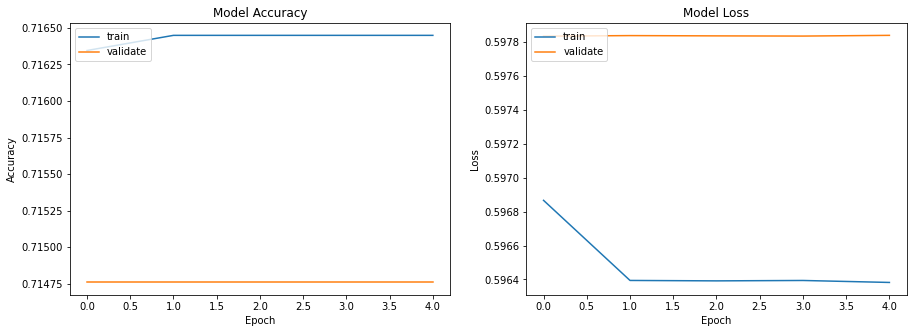

In [24]:
plotmodelhistory(model_3) 

In [41]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 32)         

Model 4

In [24]:
num_classes = 2

model4 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax' )
])

In [25]:
model4.compile(
  optimizer='adam',
  loss='SparseCategoricalCrossentropy',
  metrics=['accuracy'])

In [26]:
model_4 = model4.fit(train_ds,validation_data=val_ds, epochs=10)

Epoch 1/10
6939/6939 [==============================] - 352s 51ms/step - loss: 0.3896 - accuracy: 0.8317 - val_loss: 0.3586 - val_accuracy: 0.8463
Epoch 2/10
6939/6939 [==============================] - 348s 50ms/step - loss: 0.3535 - accuracy: 0.8492 - val_loss: 0.3627 - val_accuracy: 0.8437
Epoch 3/10
6939/6939 [==============================] - 366s 53ms/step - loss: 0.3406 - accuracy: 0.8551 - val_loss: 0.3443 - val_accuracy: 0.8518
Epoch 4/10
6939/6939 [==============================] - 373s 54ms/step - loss: 0.3325 - accuracy: 0.8586 - val_loss: 0.3353 - val_accuracy: 0.8567
Epoch 5/10
6939/6939 [==============================] - 367s 53ms/step - loss: 0.3273 - accuracy: 0.8616 - val_loss: 0.3636 - val_accuracy: 0.8414
Epoch 6/10
6939/6939 [==============================] - 360s 52ms/step - loss: 0.3219 - accuracy: 0.8637 - val_loss: 0.3345 - val_accuracy: 0.8589
Epoch 7/10
6939/6939 [==============================] - 354s 51ms/step - loss: 0.3187 - accuracy: 0.8650 - val_loss: 0

In [27]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)         

In [18]:
model4.save('saved_models/model_4')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_models/model_4/assets


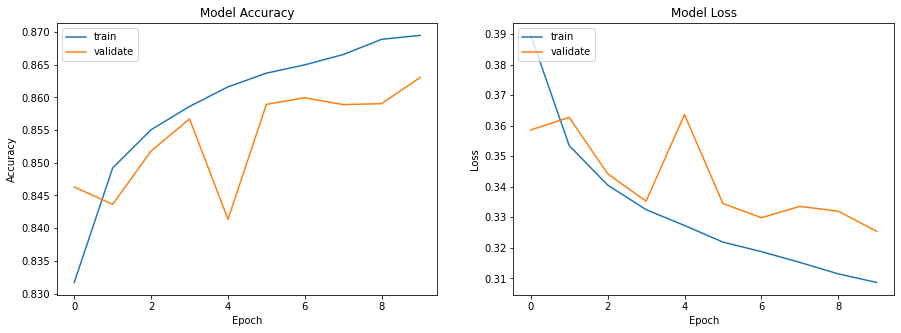

In [30]:
plotmodelhistory(model_4) 

For loop with Dan

In [93]:
y_pred2 = model4.predict_classes(val_ds)
y_pred2[:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [97]:
# for i in range(y_pred2)
class_preds = []
target = []
for images, labels in val_ds:
    class_preds.append(model4.predict_classes(images))
    target.append(labels)

In [98]:
class_preds[:3]

[array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1]),
 array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0])]

In [110]:
flat_class_preds = []
for sublist in class_preds:
    for item in sublist:
        flat_class_preds.append(item)

In [111]:
print(len(class_preds))
print(len(flat_class_preds))

1735
55504


In [131]:
target[:3]

[<tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)>]

In [122]:
target[0].numpy()

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [124]:
target_list = []
for i in target:
    target_list.append(i.numpy())
target_list

[array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32),
 array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int32),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32),
 array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int32),
 array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int32),
 array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int32),
 array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int32),
 array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

In [126]:
flat_target = []
for sublist in target_list:
    for item in sublist:
        flat_target.append(item)

In [127]:
len(flat_target)

55504

In [128]:
flat_target

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,


Code from Dan's article

In [133]:
predicts = np.array([])
labels =  np.array([])
for x, y in val_ds:
    predicts = np.concatenate([predicts, model4.predict_classes(x)])
    labels = np.concatenate([labels, y.numpy()])

In [87]:
y_pred = model4.predict(val_ds)
len(y_pred)

55504

In [86]:
y_pred

array([[0.07771508, 0.9222849 ],
       [0.21089704, 0.789103  ],
       [0.1783253 , 0.82167464],
       ...,
       [0.1013267 , 0.89867324],
       [0.14907034, 0.8509297 ],
       [0.33684477, 0.66315526]], dtype=float32)

In [36]:
rounded_predictions = np.argmax(y_pred, axis=-1)
# len(rounded_predictions)
rounded_predictions

array([1, 1, 1, ..., 1, 0, 1])

In [40]:
preds = np.where(rounded_predictions == 0, 'idc', 'non_idc')
preds

array(['non_idc', 'non_idc', 'non_idc', ..., 'non_idc', 'idc', 'non_idc'],
      dtype='<U7')

In [88]:
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

{'idc': 15664, 'non_idc': 39840}

In [89]:
print(val_class_names)

['idc', 'non_idc']


Confusion Matrix and Metrics

In [1]:
cm2 = confusion_matrix(y_true=labels, y_pred=predicts)
cm2

NameError: name 'confusion_matrix' is not defined

In [129]:
cm = confusion_matrix(y_true=flat_target, y_pred=flat_class_preds)
cm

array([[ 8332,  7500],
       [ 3494, 36178]])

In [130]:
report = classification_report(y_true=flat_target, y_pred=flat_class_preds)
print(report) 

              precision    recall  f1-score   support

           0       0.70      0.53      0.60     15832
           1       0.83      0.91      0.87     39672

    accuracy                           0.80     55504
   macro avg       0.77      0.72      0.74     55504
weighted avg       0.79      0.80      0.79     55504



In [61]:
print(accuracy_score(y_true=y_val, y_pred=preds))
# print(recall_score(y_true=y_val, y_pred=preds, pos_label='pos'))
# print(precision_score(y_true=y_val, y_pred=preds))

0.5942274430671663


In [44]:
model4.evaluate(
    x=train_ds,
#     y=val_class_names,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=True,
)



6939/6939 [==============================] - 112s 16ms/step - loss: 0.2997 - accuracy: 0.8737


{'loss': 0.29970377683639526, 'accuracy': 0.8736554980278015}

In [45]:
model4.evaluate(
    x=val_ds,
#     y=val_class_names,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=True,
)

1735/1735 [==============================] - 27s 16ms/step - loss: 0.3219 - accuracy: 0.8669


{'loss': 0.32186317443847656, 'accuracy': 0.8669285178184509}

In [108]:
train_ds

<BatchDataset shapes: ((None, 50, 50, 3), (None,)), types: (tf.float32, tf.int32)>